In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('placement_outlier.csv')

In [3]:
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [5]:
print(df['placement_exam_marks'].skew())

0.8356419499466834


<ipython-input-6-3626882fb6fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

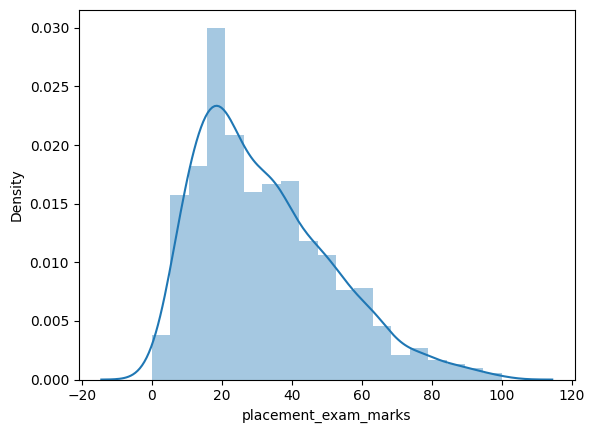

In [6]:
sns.distplot(df['placement_exam_marks'])

In [7]:
print(df['cgpa'].skew())

-0.014529938929314918


<ipython-input-8-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

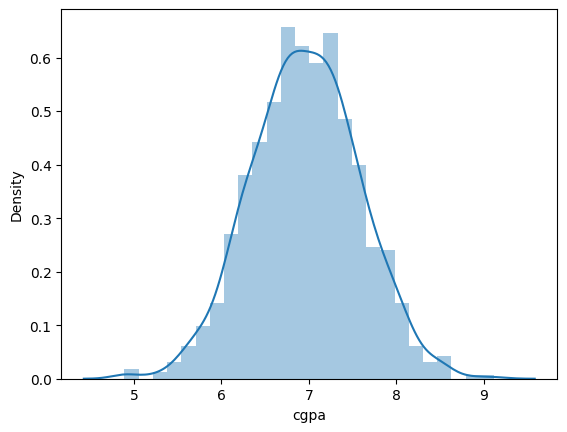

In [8]:
sns.distplot(df['cgpa'])

In [9]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

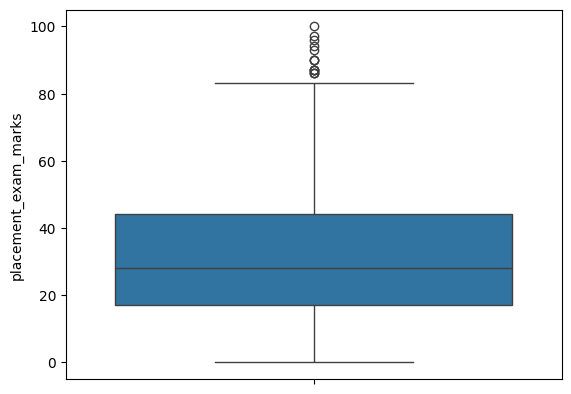

In [10]:
sns.boxplot(df['placement_exam_marks'])

In [11]:
percentile_25=df['placement_exam_marks'].quantile(0.25)
percentile_75=df['placement_exam_marks'].quantile(0.75)

In [12]:
percentile_25, percentile_75

(np.float64(17.0), np.float64(44.0))

In [13]:
iqr= percentile_75-percentile_25

In [15]:
print(iqr)

27.0


In [18]:
upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25-1.5*iqr

In [20]:
print(upper_limit , lower_limit)

84.5 -23.5


In [26]:
new_df=df[df['placement_exam_marks'] < upper_limit]


In [27]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-32-ffb97493b260>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])
<ipython-input-32-ffb97493b260>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

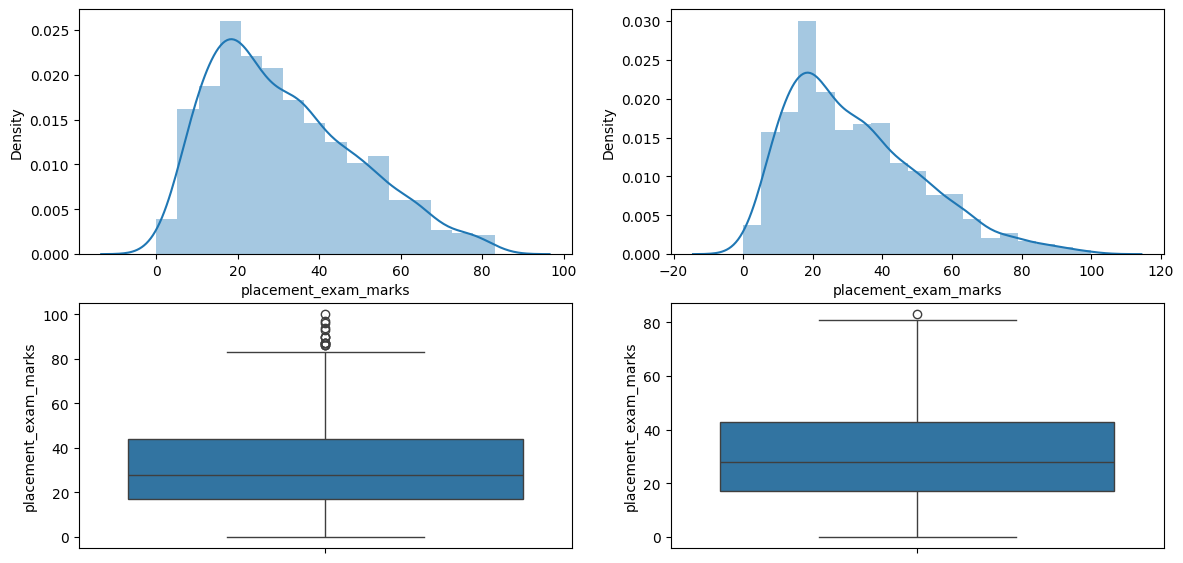

In [32]:
plt.figure(figsize=(14, 7))
plt.subplot(2,2,1)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])